## Python - Fundamentos para a Análise de Dados

### Cap 08 - Módulos Python para a Análise de Dados - SciPy

Documentação [SciPy](https://docs.scipy.org/doc/).

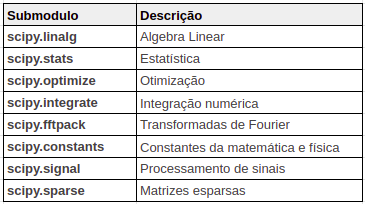

### Processamento de Imagens

In [1]:
import scipy
scipy.__version__

'1.4.1'

In [2]:
import matplotlib

In [4]:
# Função imread foi descontinuada no Scipy
# from scipy import misc
# misc.imread('Matplotlib-Mapa.png')   

# Usamos agora a função do pacote imageio
from imageio import imread
imread('Matplotlib-Mapa.png')  

# Matplotlib tem uma função similar
import matplotlib.pyplot as plt
plt.imread('Matplotlib-Mapa.png')

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

### Integração Numérica

In [5]:
import numpy as np
from numpy import *
from scipy.integrate import quad, dblquad, tplquad

In [6]:
# Integração
val, abserr = quad(lambda x: exp(-x ** 2),  Inf, Inf)
val, abserr

(0.0, 0.0)

In [7]:
from scipy.integrate import odeint, ode

In [8]:
from pylab import *
%matplotlib inline

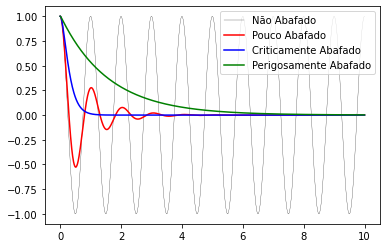

In [9]:
def dy(y, t, zeta, w0):
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]


y0 = [1.0, 0.0]

t = linspace(0, 10, 1000)
w0 = 2*pi*1.0


y1 = odeint(dy, y0, t, args=(0.0, w0)) 
y2 = odeint(dy, y0, t, args=(0.2, w0)) 
y3 = odeint(dy, y0, t, args=(1.0, w0)) 
y4 = odeint(dy, y0, t, args=(5.0, w0)) 

fig, ax = subplots()
ax.plot(t, y1[:,0], 'k', label="Não Abafado", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="Pouco Abafado")
ax.plot(t, y3[:,0], 'b', label="Criticamente Abafado")
ax.plot(t, y4[:,0], 'g', label="Perigosamente Abafado")
ax.legend();

### Fourier Transform

In [10]:
from scipy.fftpack import *

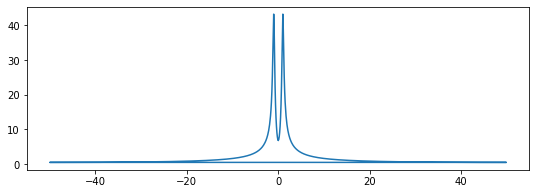

In [11]:
# Fourier transformation
N = len(t)
dt = t[1]-t[0]

F = fft(y2[:,0]) 

w = fftfreq(N, dt)

fig, ax = subplots(figsize=(9,3))
ax.plot(w, abs(F));

## Álgebra Linear

In [12]:
A = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])

In [13]:
# Resolvendo um sistema de equações lineares
x = solve(A, b)
x

array([ 2., -2.,  9.])

In [14]:
A = rand(3,3)
B = rand(3,3)

evals, evecs = eig(A)

evals

array([1.40276187+0.j        , 0.17060471+0.32114496j,
       0.17060471-0.32114496j])

In [15]:
evecs

array([[-0.52939041+0.j        , -0.40336782+0.22091277j,
        -0.40336782-0.22091277j],
       [-0.80635575+0.j        ,  0.6618095 +0.j        ,
         0.6618095 -0.j        ],
       [-0.26369718+0.j        ,  0.05131442-0.58980248j,
         0.05131442+0.58980248j]])

In [16]:
svd(A)

(array([[-0.57895608,  0.81508557, -0.02110391],
        [-0.7925831 , -0.56867026, -0.22005947],
        [-0.19136846, -0.11067816,  0.97525815]]),
 array([1.52337498, 0.45401212, 0.2682086 ]),
 array([[-0.8230322 , -0.5324064 , -0.19789243],
        [ 0.20349866, -0.60167365,  0.77238405],
        [-0.53028887,  0.5954261 ,  0.60354078]]))

### Otimização

In [17]:
from scipy import optimize

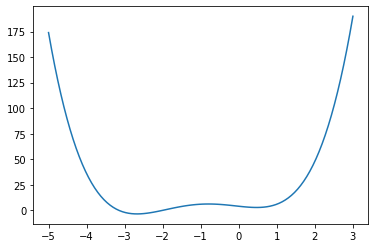

In [18]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

fig, ax  = subplots()
x = linspace(-5, 3, 100)
ax.plot(x, f(x));

In [19]:
x_min = optimize.fmin_bfgs(f, -0.5)
x_min

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 4
         Function evaluations: 18
         Gradient evaluations: 6


array([0.46961743])

In [20]:
x_min = optimize.fmin_bfgs(f, -0.5)
x_min

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 4
         Function evaluations: 18
         Gradient evaluations: 6


array([0.46961743])

## Estatística

In [21]:
from scipy import stats

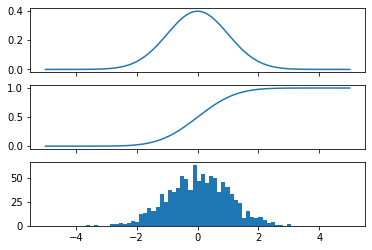

In [22]:
Y = stats.norm()

x = linspace(-5,5,100)

fig, axes = subplots(3,1, sharex=True)

axes[0].plot(x, Y.pdf(x))

axes[1].plot(x, Y.cdf(x));

axes[2].hist(Y.rvs(size=1000), bins=50);

In [23]:
Y.mean(), Y.std(), Y.var()

(0.0, 1.0, 1.0)